In [211]:
import os
import pandas as pd
import numpy as np
import helpers

from sklearn.model_selection import train_test_split


In [212]:
organism = 'yeasts288c'

In [213]:
df = pd.read_csv('./data/cub2.csv', index_col=0)

df['actual_binary'] = np.where(df['median_exp'] > np.median(df['median_exp'].values), 1, 0)

low, high = df.median_exp.quantile([0.33, 0.67])
high_l = np.where(df['median_exp'] > high, 2, 0)
low_l = np.where(df['median_exp'] > low, 0, 1)
df['actual_multi'] = high_l+low_l

df = df[df['species'] == organism]

In [214]:
#set(df['species'])

In [215]:
df = helpers.add_codons_to_df(df, 'Sequence')
df.columns

Index(['GeneName', 'median_exp', 'Sequence', 'species', 'mlphi_est', 'CAI',
       'CAI2', 'actual_binary', 'actual_multi', 'codons_cleaned'],
      dtype='object')

In [216]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

In [217]:
l = []

with open('./results/codonBERT_binary_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))

df_test['BERT-CUB-b'] = l
#df_test['BERT-CUB-b'] = l[:-1]

In [218]:
l = []

with open('./results/codonBERT_multi_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
df_test['BERT-CUB-m'] = l
#df_test['BERT-CUB-m'] = l[:-1]

In [219]:
df_test['log_median_exp'] = np.log(df_test['median_exp'])

In [220]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

def spearman_plot(df, y_col, x_col, title, c_s='#068cf9', c_l='#ff0051'):
    rho, p = spearmanr(df[y_col], df[x_col], nan_policy='omit')
    
    ax = sns.lmplot(df, x=x_col, y=y_col, scatter_kws={'color': c_s}, line_kws={'color': c_l})
    ax.fig.text(0.25, 0.9, 'r_s = '+str(round(rho, 3)), color=c_l)
    
    plt.title(title)
    plt.xlabel('Median Expression (log)')
    plt.ylabel('Predicted Expression')
    
    plt.show()
    plt.clf()

In [221]:
df_test.columns

Index(['GeneName', 'median_exp', 'Sequence', 'species', 'mlphi_est', 'CAI',
       'CAI2', 'actual_binary', 'actual_multi', 'codons_cleaned', 'BERT-CUB-b',
       'BERT-CUB-m', 'log_median_exp'],
      dtype='object')

In [222]:
df_test_low = df_test[df_test['actual_multi'] == 1]
df_test_med = df_test[df_test['actual_multi'] == 0]
df_test_high = df_test[df_test['actual_multi'] == 2]

In [223]:
len(df_test_low)

32

In [224]:
df_test_med = df_test_med.sample(32)

In [225]:
df_test_high = df_test_high.sample(32)

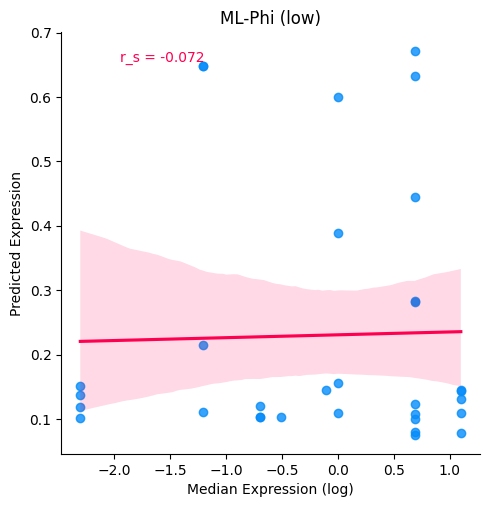

<Figure size 640x480 with 0 Axes>

In [226]:
spearman_plot(df_test_low, 'mlphi_est', 'log_median_exp', 'ML-Phi (low)')

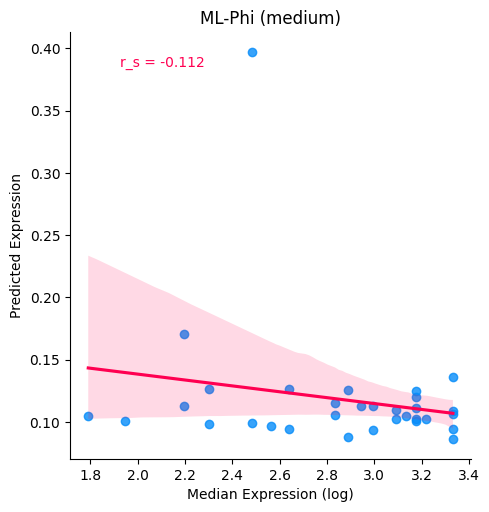

<Figure size 640x480 with 0 Axes>

In [227]:
spearman_plot(df_test_med, 'mlphi_est', 'log_median_exp', 'ML-Phi (medium)')

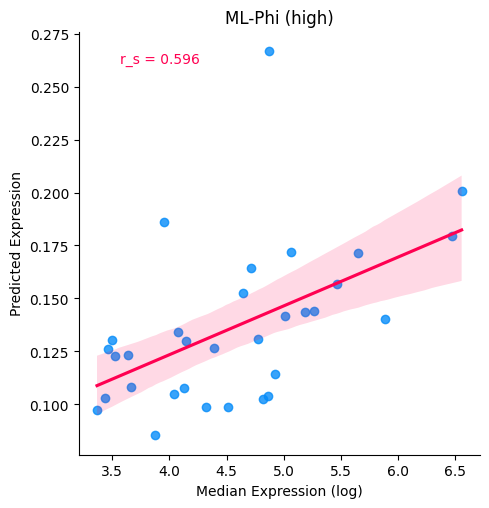

<Figure size 640x480 with 0 Axes>

In [228]:
spearman_plot(df_test_high, 'mlphi_est', 'log_median_exp', 'ML-Phi (high)')

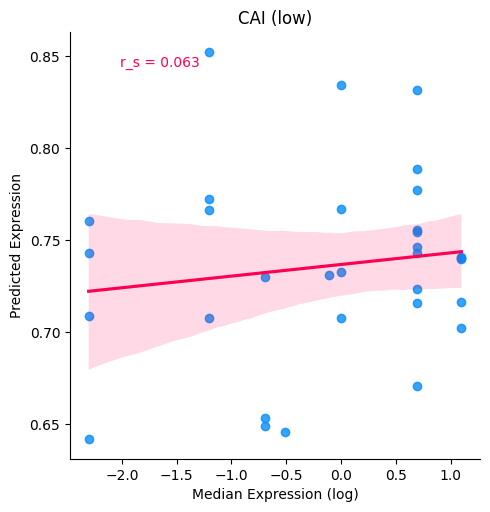

<Figure size 640x480 with 0 Axes>

In [229]:
spearman_plot(df_test_low, 'CAI2', 'log_median_exp', 'CAI (low)')

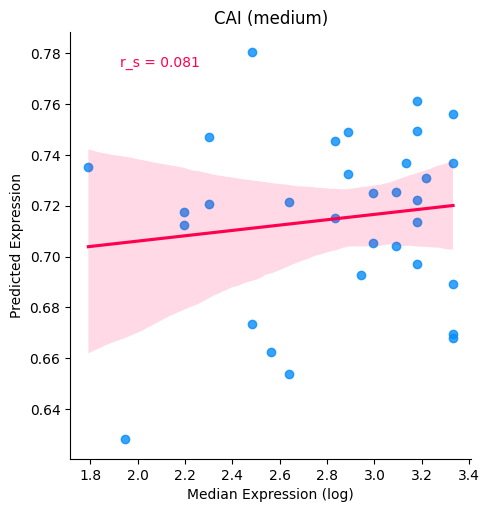

<Figure size 640x480 with 0 Axes>

In [230]:
spearman_plot(df_test_med, 'CAI2', 'log_median_exp', 'CAI (medium)')

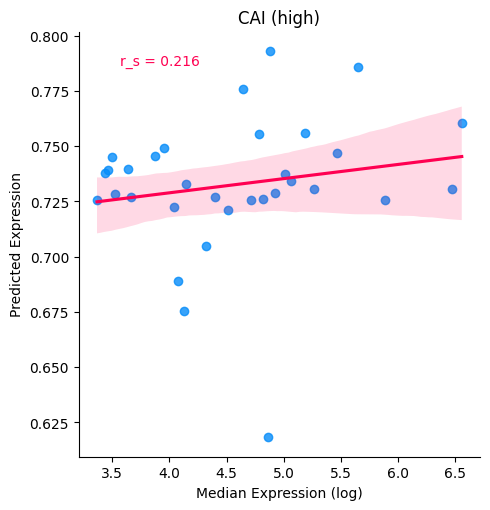

<Figure size 640x480 with 0 Axes>

In [231]:
spearman_plot(df_test_high, 'CAI2', 'log_median_exp', 'CAI (high)')

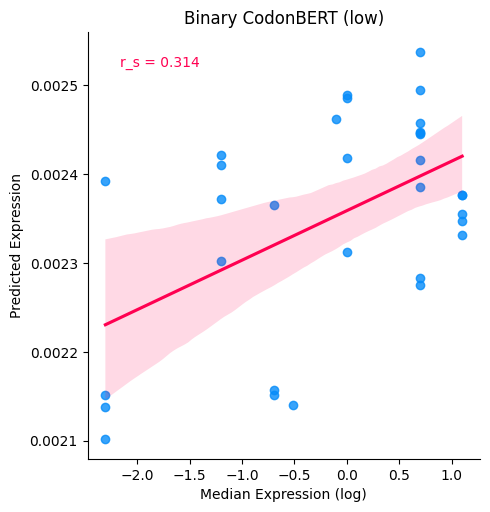

<Figure size 640x480 with 0 Axes>

In [232]:
spearman_plot(df_test_low, 'BERT-CUB-b', 'log_median_exp', 'Binary CodonBERT (low)')

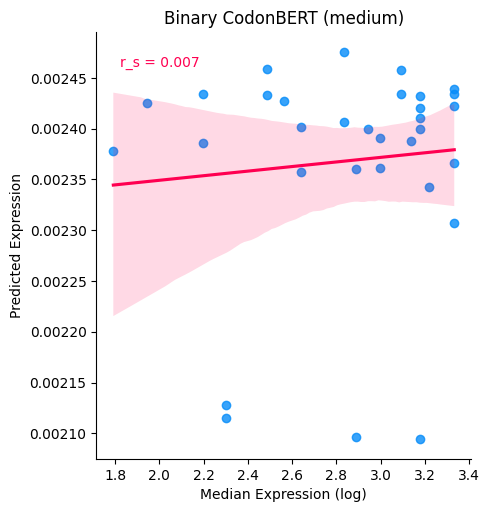

<Figure size 640x480 with 0 Axes>

In [233]:
spearman_plot(df_test_med, 'BERT-CUB-b', 'log_median_exp', 'Binary CodonBERT (medium)')

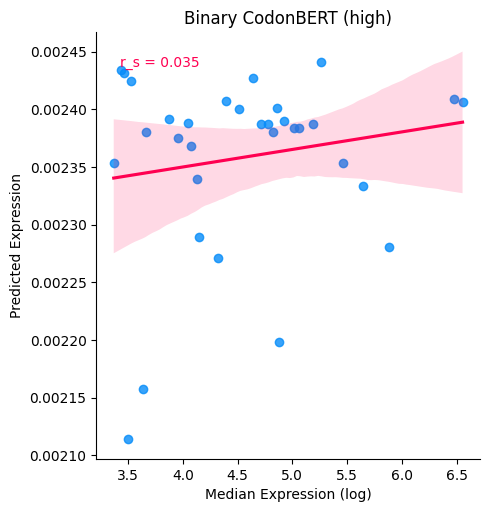

<Figure size 640x480 with 0 Axes>

In [234]:
spearman_plot(df_test_high, 'BERT-CUB-b', 'log_median_exp', 'Binary CodonBERT (high)')

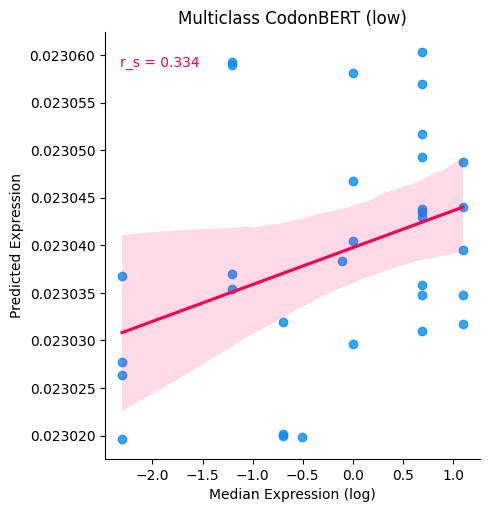

<Figure size 640x480 with 0 Axes>

In [235]:
spearman_plot(df_test_low, 'BERT-CUB-m', 'log_median_exp', 'Multiclass CodonBERT (low)')

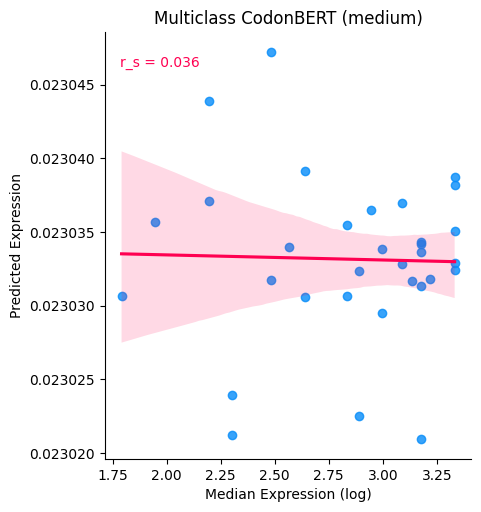

<Figure size 640x480 with 0 Axes>

In [236]:
spearman_plot(df_test_med, 'BERT-CUB-m', 'log_median_exp', 'Multiclass CodonBERT (medium)')

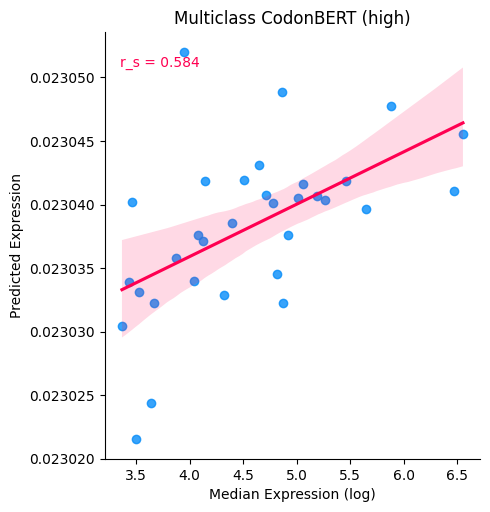

<Figure size 640x480 with 0 Axes>

In [237]:
spearman_plot(df_test_high, 'BERT-CUB-m', 'log_median_exp', 'Multiclass CodonBERT (high)')